Downloading a json file and using open to load to dataset


In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
import json
with open('./sarcasm.json','r') as f:
    dataset=json.load(f)

--2022-11-12 07:44:13--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2022-11-12 07:44:13 (108 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
# Creating empty lists to get sentences and labels from the dataset
sentences=[]
labels=[]
for item in dataset:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

Next is to split the sentences and labels into training and testing sentences and labels

In [ ]:
training_size=20000
#split the sentences into training and testing
training_sentences=sentences[:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[:training_size]
testing_labels=labels[training_size:]

Data preprocessing 
1. Tokenizing and padding
2. Converting the training and testing labels into the numpy arrays(similar to tensors)

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
vocab_size=10000
max_length=120
trunc_type='post'
padding_type='post'
oov_tok= ""
#Initialize the tokenizer class
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
#Generate the word index
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
#Generate and padd the sequences fo both the training and testing sentences
training_sequences=tokenizer.texts_to_sequences(training_sentences)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
#then pad them
training_padded=pad_sequences(training_sequences,truncating=trunc_type,maxlen=max_length,padding=padding_type)
testing_padded=pad_sequences(testing_sequences,truncating=trunc_type,maxlen=max_length,padding=padding_type)
#Converting the lables into numpy arrays 
training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)


Now after preprocessing we start to build the model

In [ ]:
#Defining parameters needed for building the model
embedding_dim=16
lstm_dim=32
dense_dim=24
#Building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model to the training_sequences and labels
history_lstm=model.fit(training_padded,training_labels,epochs=10,validation_data=(testing_padded,testing_labels))


Epoch 1/10
625/625 [==============================] - 50s 74ms/step - loss: 0.4140 - accuracy: 0.8022 - val_loss: 0.3342 - val_accuracy: 0.8538
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.2197 - accuracy: 0.9112 - val_loss: 0.3380 - val_accuracy: 0.8602
Epoch 3/10
625/625 [==============================] - 61s 98ms/step - loss: 0.1436 - accuracy: 0.9449 - val_loss: 0.3936 - val_accuracy: 0.8515
Epoch 4/10
625/625 [==============================] - 60s 95ms/step - loss: 0.0921 - accuracy: 0.9667 - val_loss: 0.5377 - val_accuracy: 0.8442
Epoch 5/10
625/625 [==============================] - 60s 96ms/step - loss: 0.0563 - accuracy: 0.9811 - val_loss: 0.6472 - val_accuracy: 0.8416
Epoch 6/10
625/625 [==============================] - 50s 81ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.6794 - val_accuracy: 0.8404
Epoch 7/10
625/625 [==============================] - 43s 68ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.8229 - val_accuracy:

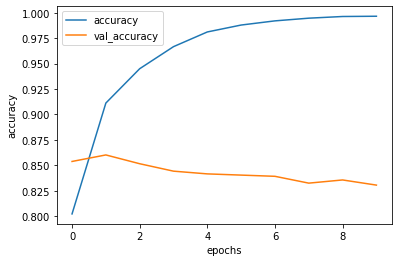

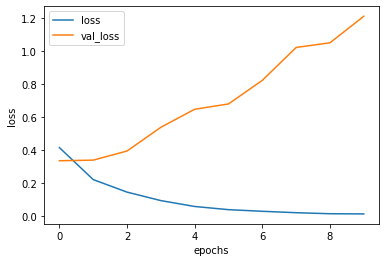

In [ ]:
import matplotlib.pyplot as plt
def Plot_graph(history,STRING):
  plt.plot(history.history[STRING])
  plt.plot(history.history["val_"+STRING])
  plt.xlabel('epochs')
  plt.ylabel(STRING)
  plt.legend([STRING,'val_'+STRING])
  plt.show()

Plot_graph(history_lstm,'accuracy')
Plot_graph(history_lstm,'loss')